# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 11<sup>th </sup> Computational Exercise

## Machine Learning

In [12]:
# useful libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = False ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = False
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A. Linear Regression

We start by considering the problem of training a NN to fit a linear function:

$$
f(x)=mx+b
$$

#### --> Setting the regreession problem

In [13]:
m = 2 # slope
b = 1 # intersect

#### --> Generate training and validation set

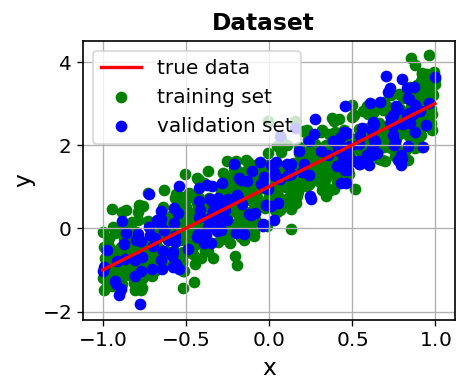

In [18]:
## SIZE OF THE DATASET
Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set

np.random.seed(0) ## fixing seed for reproducibility
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
sigma = 0.5 # gaussian noise on the training and validation set
y_train = np.random.normal(m * x_train + b, sigma) # actual measures
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(x_valid, y_target, color='red', label = 'true data')
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.scatter(x_valid, y_valid, color='blue', label = 'validation set')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### ---> Define the NN structure

In [19]:
Nnodes_in = 1  ## input size
Nnodes_out = 1 ## output size

models = []

## DEFINE DIFFERENT MODELS

## 1. No Hidden Layer / linear activation function /
models.append(tf.keras.Sequential())
models[0].add(Dense(Nnodes_out, input_shape=(Nnodes_in,), activation = 'linear'))

## 2. No Hidden Layer / nonlinear activation function
models.append(tf.keras.Sequential())
models[1].add(Dense(Nnodes_out, input_shape=(Nnodes_in,), activation = 'tanh'))

## 3. 1 Hidden Layer / nonlinear activation functions
models.append(tf.keras.Sequential())
models[2].add(Dense(16, input_shape=(Nnodes_in,), activation = 'tanh'))
models[2].add(Dense(Nnodes_out, activation = 'linear'))

## optimizer
##opt = tf.keras.optimizers.Adam(learning_rate=0.01,
##    beta_1=0.9,
##    beta_2=0.999,
##    epsilon=1e-07,
##    amsgrad=False)

## compile the model
for model in models:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary 
for model in models:
    model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_15 (Dense)    

#### --> Define the learning protocol and train the NN

In [20]:
Nepochs = [100, 100, 100]
bs = 32 ## typical values are 32 64 128 256

# report training progress against validation data
history = []
i = 1
for model in models:
    print("\n***Training model {}:*** ".format(i))
    history.append(model.fit(x=x_train, 
                             y=y_train, 
                             batch_size=bs, 
                             epochs=Nepochs[i-1],
                             shuffle=True,
                             verbose = False,
                             validation_data=(x_valid, y_valid)))
    i = i+1
# return weights
for model in models:
    model.get_weights()
    
print("\nTraining succesfully completed!")


***Training model 1:*** 

***Training model 2:*** 

***Training model 3:*** 

Training succesfully completed!


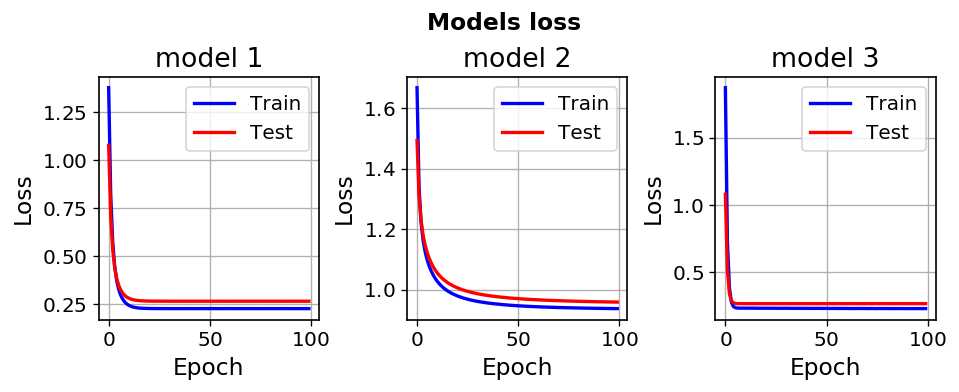

In [319]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.plot(history[i].history['loss'], 'b')
    plt.plot(history[i].history['val_loss'], 'r')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('model {}'.format(i+1))
    plt.legend(['Train', 'Test'])
plt.show()

#### --> Model's performance evaluation and prediction

7/7 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013

Test loss: [0.0003321771218907088, 0.0003321771218907088]
Test accuracy: [0.6969940662384033, 0.6969940662384033]


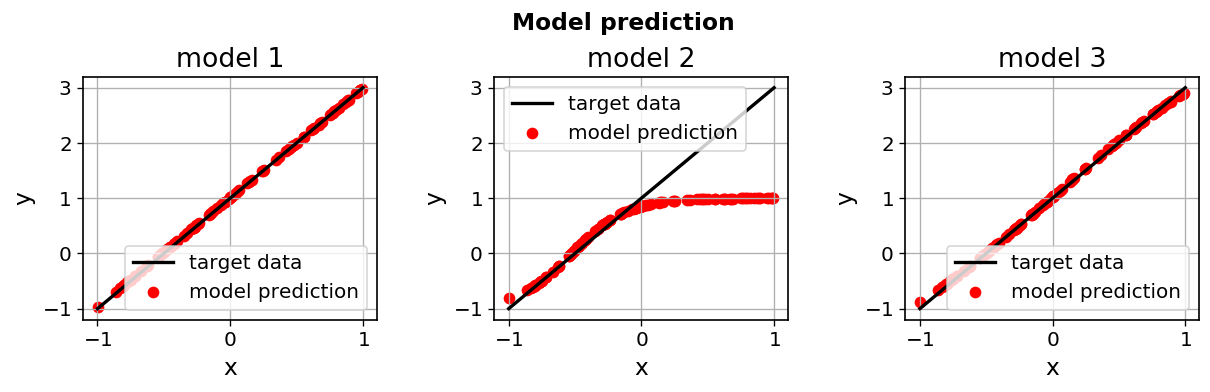

In [320]:
# evaluate model with the exact curve
score = []

for model in models:
    score.append(model.evaluate(x_valid, 
                                y_target, 
                                batch_size=bs, 
                                verbose=1))
## print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = []
for model in models:
    y_predicted.append(model.predict(x_predicted))

plt.figure(figsize=(12, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.scatter(x_predicted, y_predicted[i], color='red', label = 'model prediction')
    plt.plot(x_valid, y_target, color = 'black', label = 'target data')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title('model {}'.format(i+1))
plt.show()

###   B. Polynomial Regression

$$
f(x)=a + bx+cx^2+dx^3 \qquad \text{for} \  x \in [-1,1]
$$



#### --> setting the polynomial regression problem

In [22]:
a = 4.
b = -3.
c = -2.
d = 3.

#### --> Generate training and validation set

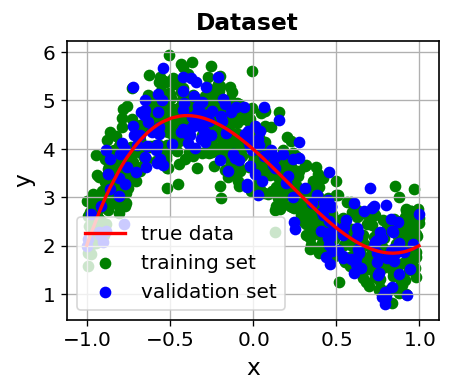

In [23]:
Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set

np.random.seed(0) ## fixing seed for reproducibility
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, Nvalid)
x_valid.sort()

sigma = 0.5 # gaussian noise on the training and validation set
y_target = a + b*x_valid+c*x_valid**2+d*x_valid**3
y_train = np.random.normal(a + b*x_train+c*x_train**2+d*x_train**3, sigma) # actual measures
y_valid = np.random.normal(a + b*x_valid+c*x_valid**2+d*x_valid**3, sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
plt.plot(x_valid, y_target, color='red', label = 'true data')
plt.scatter(x_train, y_train, color = 'green', label = 'training set')
plt.scatter(x_valid, y_valid, color='blue', label = 'validation set')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### ---> Define the NN model

In [24]:
Nnodes_in = 1
Nnodes_out = 1

models = []

## DEFINE DIFFERENT MODELS

## 1. No Hidden Layer / linear activation function /
models.append(tf.keras.Sequential())
models[0].add(Dense(Nnodes_out, input_shape=(Nnodes_in,), activation = 'linear'))

## 2. 1 Hidden Layer / nonlinear activation functions + linear
models.append(tf.keras.Sequential())
models[1].add(Dense(16, input_shape=(Nnodes_in,), activation = 'sigmoid'))
models[1].add(Dense(Nnodes_out, activation = 'linear'))

## 3. 2 Hidden Layers / nonlinear activation functions + linear
models.append(tf.keras.Sequential())
models[2].add(Dense(16, input_shape=(Nnodes_in,), activation = 'tanh'))
models[2].add(Dense(16, activation = 'tanh'))
models[2].add(Dense(Nnodes_out, activation = 'linear'))

## optimizer
##opt = tf.keras.optimizers.Adam(learning_rate=0.01,
##    beta_1=0.9,
##    beta_2=0.999,
##    epsilon=1e-07,
##    amsgrad=False)

## compile the model
for model in models:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary 
for model in models:
    model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense) 

#### --> Define the learning protocol and train the NN

In [25]:
Nepochs = [50, 500, 500]
bs = 32 ## typical values are 1 (pure SGD) 16 32 64 128 256

# report training progress against validation data
history = []
i = 1
for model in models:
    print("\n***Training model {}:*** ".format(i))
    history.append(model.fit(x=x_train, 
                             y=y_train, 
                             batch_size=bs, 
                             epochs=Nepochs[i-1],
                             shuffle=True,
                             verbose = False,
                             validation_data=(x_valid, y_valid)))
    i = i+1
# return weights
for model in models:
    model.get_weights()
    
print("\n Training successfully completed")


***Training model 1:*** 

***Training model 2:*** 

***Training model 3:*** 

 Training successfully completed


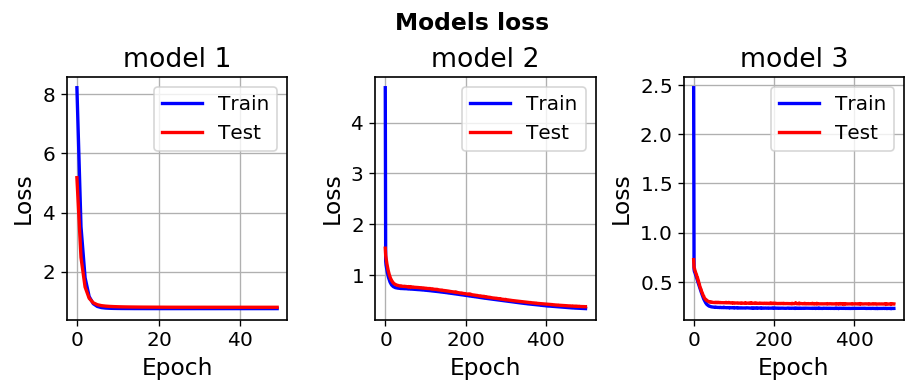

In [27]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.plot(history[i].history['loss'], 'b')
    plt.plot(history[i].history['val_loss'], 'r')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('model {}'.format(i+1))
    plt.legend(['Train', 'Test'])
plt.show()

#### --> Model's performance evaluation and prediction

7/7 [==============================] - 0s 1ms/step - loss: 0.0100 - mse: 0.0100

Test loss: [0.5164700746536255, 0.5164700746536255]
Test accuracy: [0.11020520329475403, 0.11020520329475403]


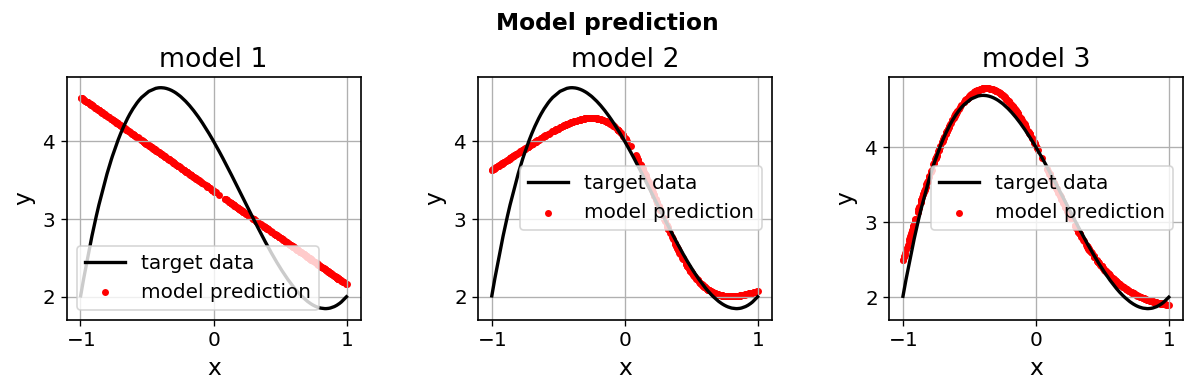

In [29]:
# evaluate model with the exact curve
score = []

for model in models:
    score.append(model.evaluate(x_valid, 
                                y_target, 
                                batch_size=bs, 
                                verbose=1))
## print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_predicted = np.random.uniform(-1, 1, 500)
y_predicted = []
for model in models:
    y_predicted.append(model.predict(x_predicted))

plt.figure(figsize=(12, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

for i in range(len(models)):
    plt.subplot(1, 3, i+1);
    plt.scatter(x_predicted, y_predicted[i], color='red', s=10, label = 'model prediction')
    plt.plot(x_valid, y_target, color = 'black', label = 'target data')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title('model {}'.format(i+1))
plt.show()

###   C. Regression on a 2D trigonometric function

$$f(x,y) = \sin(x^2+y^2) \qquad \qquad  x \in [-3/2,3/2], \ \ y \in [-3/2,3/2]$$.

#### --> Generate training and validation set

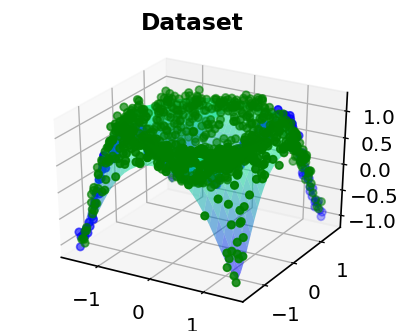

In [31]:
Npoints = 1000 ## number of points in the dataset 
Ntrain = int(0.8*Npoints) ## number of points in the training set
Nvalid = int(0.2*Npoints) ## number of points in the validation set

np.random.seed(0) ## fixing seed for reproducibility
x_train = np.random.uniform(-3/2, 3/2, Ntrain)
y_train = np.random.uniform(-3/2, 3/2, Ntrain)

x_valid = np.random.uniform(-3/2, 3/2, Nvalid)
y_valid = np.random.uniform(-3/2, 3/2, Nvalid)

x_valid.sort()
y_valid.sort()

z_target=np.sin(x_valid**2+y_valid**2)

sigma = 0.1 ## gaussian noise on the training and validation set
z_train=np.random.normal(np.sin(x_train**2+y_train**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

# plot training and target dataset
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Dataset', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

x = np.linspace(-3/2, 3/2, 30)
y = np.linspace(-3/2, 3/2, 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(X**2+Y**2)

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, 
                rstride=1, cstride=1, cmap='winter', edgecolor='none',
                alpha=0.5, label='true data')
#ax.scatter(x_valid, y_valid, z_target, marker = 'o', color = 'red', label = 'true data')
ax.scatter(x_train, y_train, z_train, marker='o', color = 'green', label = 'training set')
ax.scatter(x_valid, y_valid, z_valid, marker='o', color = 'blue', label = 'validation set')
plt.show()


#### ---> Define the NN model

In [32]:
Nnodes_in = 2
Nnodes_out = 1

## 2 Hidden Layers / nonlinear activation functions + linear
model = tf.keras.Sequential()
model.add(Dense(16, input_shape=(Nnodes_in,), activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(Nnodes_out, activation = 'linear'))

## compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary 
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


#### --> Define the learning protocol and train the NN

In [33]:
Nepochs = 500
bs = 32 ## typical values are 1 (pure SGD) 16 32 64 128 256

xy_valid=np.array([
    [x_valid[i],y_valid[i]] for i in range(Nvalid)
])
xy_train=np.array([
    [x_train[i],y_train[i]] for i in range(Ntrain)
])

# report training progress against validation data
print("\n***Training model 1:*** ")
history = model.fit(x=xy_train, y=z_train, batch_size=bs, epochs=Nepochs, 
                    shuffle=True, verbose = False, validation_data=(xy_valid, z_valid))

model.get_weights()

print("\nTraining successfully completed!")


***Training model 1:*** 

Training successfully completed!


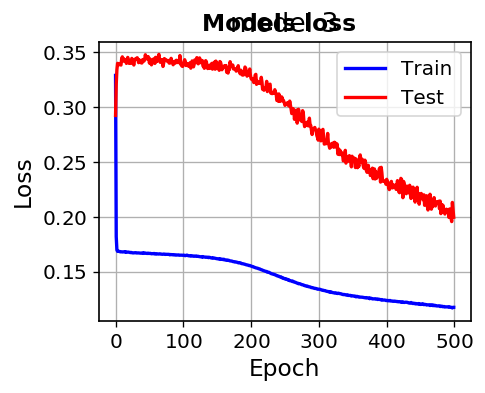

In [334]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Models loss', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8

plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('model {}'.format(i+1))
plt.legend(['Train', 'Test'])
plt.show()

#### --> Model's performance evaluation and prediction

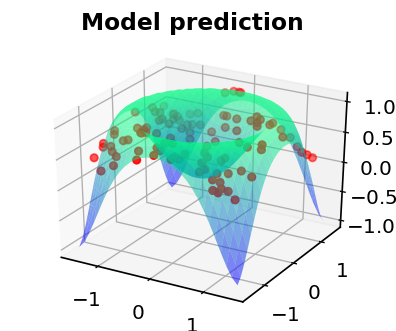

In [336]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = np.random.uniform(-1.5, 1.5, 100)
xy_predicted=np.array([[x_predicted[i],y_predicted[i]] for i in range(100)])

z_predicted = model.predict(xy_predicted)

ax = plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('Model prediction', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none',alpha=0.5)
ax.scatter(x_predicted, y_predicted, z_predicted, color = 'red', marker='o')

plt.show()